In [10]:
!pip install labelme tensorflow tensorflow-gpu opencv-python matplotlib albumenations

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 405.1 kB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 717.3 kB/s eta 0:00:0000:0100:08
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 2.8 MB/s eta 0:00:0000:0100:01
ERROR: Could not find a version that satisfies the requirement albumenations (from versions: none)
ERROR: No matching distribution found for albumenations


Importing Necessary Modules

In [17]:
import os
import time 
import uuid
import cv2

In [6]:
IMAGES_PATH = os.path.join('data', 'images')
number_images = 40

In [7]:
cap = cv2.VideoCapture(0)

for imgnum in range(number_images):
    print('Collection image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH, f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF==ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Collection image 0


error: OpenCV(4.6.0) /io/opencv/modules/highgui/src/window.cpp:1267: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [1]:
import json
import tensorflow as tf
import json
import numpy as np
import matplotlib.pyplot as plt

2022-10-30 10:38:18.140113: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-30 10:38:18.994180: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-30 10:38:18.994335: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-30 10:38:19.168921: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-30 10:38:22.245667: W tensorflow/stream_executor/platform/de

Limit GPU Memory Growth

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')

for gpu in gpus:
    tf.config.expermiental.set_memory_growth(gpu, True)

2022-10-30 10:38:31.162305: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-10-30 10:38:31.162455: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ajinkya): /proc/driver/nvidia/version does not exist


In [3]:
tf.config.list_physical_devices('GPU')

[]

Loading Image Into TF Date Pipeline

In [4]:
images = tf.data.Dataset.list_files('data/images/*.jpg', shuffle = False)

2022-10-30 10:38:38.198996: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Checking If The Data/Images Are Loaded

In [5]:
images.as_numpy_iterator().next()

b'data/images/028bc334-5810-11ed-9d5e-4f89984684f3.jpg'

In [37]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.image.decode_jpeg(byte_img)
    print(img.shape)
    return img

In [38]:
images = images.map(load_image)

TypeError: in user code:

    File "/tmp/ipykernel_5045/3019084189.py", line 2, in load_image  *
        byte_img = tf.io.read_file(x)

    TypeError: Input 'filename' of 'ReadFile' Op has type uint8 that does not match expected type of string.


In [23]:
images.as_numpy_iterator().next()

array([[[135, 145, 120],
        [141, 147, 119],
        [149, 150, 116],
        ...,
        [148, 216, 237],
        [149, 217, 240],
        [151, 219, 242]],

       [[132, 141, 120],
        [136, 144, 120],
        [147, 148, 117],
        ...,
        [149, 217, 238],
        [150, 218, 241],
        [151, 219, 242]],

       [[125, 135, 124],
        [130, 138, 123],
        [140, 142, 121],
        ...,
        [150, 218, 241],
        [149, 216, 242],
        [150, 217, 243]],

       ...,

       [[ 93,  80,  46],
        [ 94,  81,  46],
        [ 95,  82,  47],
        ...,
        [ 78, 108, 110],
        [ 87, 112, 116],
        [ 91, 115, 117]],

       [[ 91,  80,  50],
        [ 90,  79,  47],
        [ 90,  79,  47],
        ...,
        [ 83, 112, 110],
        [ 86, 115, 113],
        [ 89, 115, 114]],

       [[ 88,  79,  50],
        [ 88,  79,  48],
        [ 88,  77,  47],
        ...,
        [ 85, 114, 112],
        [ 85, 114, 110],
        [ 84, 113, 109]]

In [8]:
type(images)

tensorflow.python.data.ops.dataset_ops.MapDataset

Viewing Raw Images With Matplotlib

In [36]:
image_generator = images.batch(4).as_numpy_iterator()
plot_images = image_generator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    print(image.shape)
    ax[idx].imshow(image)

plt.show()

2022-10-30 11:24:45.365094: W tensorflow/core/framework/op_kernel.cc:1780] OP_REQUIRES failed at whole_file_read_ops.cc:114 : NOT_FOUND: data/images/028bc334-5810-11ed-9d5e-4f89984684f3.jpg; No such file or directory


NotFoundError: {{function_node __wrapped__IteratorGetNext_output_types_1_device_/job:localhost/replica:0/task:0/device:CPU:0}} data/images/028bc334-5810-11ed-9d5e-4f89984684f3.jpg; No such file or directory
	 [[{{node ReadFile}}]] [Op:IteratorGetNext]

Partition Unaugmented Data

Move The Mathcing Labels

In [12]:
for folder in ['train', 'test', 'val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):

        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data', 'labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data', folder, 'labels', filename)
            os.replace(existing_filepath, new_filepath)


Applying Image Augmentation On Images And Label Using Albumentations

In [13]:
import albumentations as alb

In [15]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450),
                        alb.HorizontalFlip(p=0.5), alb.RandomBrightnessContrast(p=0.2),
                        alb.RandomGamma(p=0.2), alb.RGBShift(p=0.2), alb.VerticalFlip(p=0.5)],
                        bbox_params=alb.BboxParams(format='albumentations', 
                                                    label_fields=['class_labels']))

Load A Test Image And Annotation With OpenCV And JSON

In [23]:
img = cv2.imread(os.path.join('data', 'train', 'images', 'd6efc0fc-578f-11ed-be4b-088fc30da5ad.jpg'))
# plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
# plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
# plt.show()

In [26]:
with open(os.path.join('data', 'train' ,'labels', 'd6efc0fc-578f-11ed-be4b-088fc30da5ad.json'), 'r') as f:
    label = json.load(f)

In [29]:
label['shapes']

[{'label': 'face',
  'points': [[196.15384615384613, 78.97435897435898],
   [529.4871794871794, 453.33333333333337]],
  'group_id': None,
  'shape_type': 'rectangle',
  'flags': {}}]

Extract Co-ordinates And Rescale To Match Image Resolution

In [55]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]
coords


[196.15384615384613, 78.97435897435898, 529.4871794871794, 453.33333333333337]

In [56]:
coords = list(np.divide(coords, [640, 480, 640, 480]))
coords

[0.3064903846153846,
 0.16452991452991453,
 0.8273237179487178,
 0.9444444444444445]

Apply Augmentations And View Results

In [57]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
augmented

{'image': array([[[ 40,  67,  88],
         [ 39,  65,  89],
         [ 39,  65,  89],
         ...,
         [ 93,  91,  83],
         [ 93,  91,  83],
         [ 95,  93,  85]],
 
        [[ 41,  68,  89],
         [ 41,  67,  91],
         [ 38,  66,  90],
         ...,
         [ 94,  91,  83],
         [ 95,  92,  84],
         [ 99,  96,  88]],
 
        [[ 38,  66,  90],
         [ 39,  66,  92],
         [ 37,  67,  92],
         ...,
         [ 98,  93,  84],
         [100,  95,  86],
         [103,  98,  89]],
 
        ...,
 
        [[215, 192, 144],
         [222, 197, 147],
         [232, 203, 152],
         ...,
         [207, 181, 141],
         [207, 181, 144],
         [208, 182, 146]],
 
        [[226, 196, 147],
         [231, 200, 149],
         [236, 204, 151],
         ...,
         [208, 181, 144],
         [207, 181, 145],
         [208, 181, 147]],
 
        [[229, 194, 144],
         [231, 194, 142],
         [234, 195, 143],
         ...,
         [207, 181,

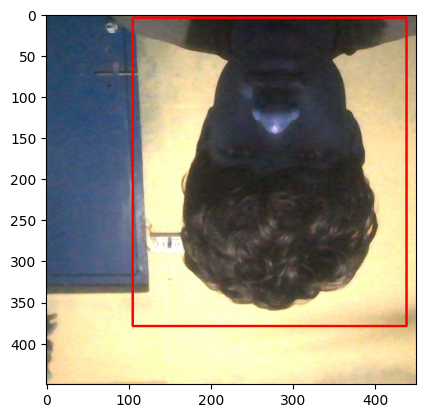

In [62]:
cv2.rectangle(augmented['image'],
                tuple(np.multiply(augmented['bboxes'][0][:2], [450, 450]).astype(int)),
                tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)),
                (255, 0, 0), 2)
plt.imshow(augmented['image'])